In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:90%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:10pt;}
div.text_cell_render.rendered_html{font-size:11pt;}
div.output {font-size:10pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:10pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:10pt;padding:5px;}
table.dataframe{font-size:10px;}
</style>
"""))

<font size="5" color="red"><b>ch2. 군집분석</b></font>
# 1절. 군집모델(클러스터링)
- 클러스터(cluster) : 독립변수의 특성이 유사한 데이터의 그룹
- 클러스터링(clustering) : 주어진 데이터를 여러 개의 클러스터로 구분하는 것
1) 중심 기반 클러스터링(K-Means) : https://commons.wikimedia.org/wiki/File:KMeans-Gaussian-data.svg
<img src="https://upload.wikimedia.org/wikipedia/commons/e/e5/KMeans-Gaussian-data.svg"
style="display: block; margin-left: 0; width: 20%;">
2) 연결기반 클러스터링(DBSCAN) : https://commons.wikimedia.org/wiki/File:DBSCAN-density-data.svg
<img src="https://upload.wikimedia.org/wikipedia/commons/0/05/DBSCAN-density-data.svg"
width="300"
style="display: block; margin-left: 0; width: 20%;">
3) 밀도기반 클러스터링(DBSCAN의 변형으로 OPTICS) :
https://commons.wikimedia.org/wiki/File:OPTICS-Gaussian-data.svg
<img src="https://upload.wikimedia.org/wikipedia/commons/8/8a/OPTICS-Gaussian-data.svg"
width="300"
style="display: block; margin-left: 0; width: 20%;">

# 2절 K-Means 클러스터링
- 가장 단순하고 빠른 클러스터링 알고리즘
- 중심점을 찾아가는 알고리즘
- 세부 알고리즘 교안 6page

In [2]:
# 분류를 위한 가상의 데이터 생성
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=20, # 데이터 갯수
                          n_features=2,  # 독립변수 개수(기본값 20)
                          n_informative=2, # 타겟변수에 영향을 미치는 독립변수 갯수
                          n_redundant=0,   # 타겟변수에 영향을 미치지 않는 독립변수 갯수
                          n_clusters_per_class=1, # 각 타겟변수 그룹별 서브그룹이 없음
                          n_classes=2, # 타겟변수의 그룹수 
                          random_state=123)
import numpy as np
print(X.shape, y.shape)
np.c_[X, y][:3]

(20, 2) (20,)


array([[ 1.03859554,  2.51175389,  0.        ],
       [ 1.00271366,  1.93521549,  0.        ],
       [-1.6881048 ,  0.02599427,  1.        ]])

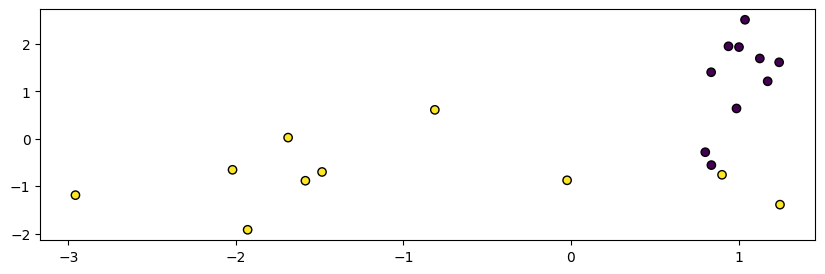

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,3))
plt.scatter(x = X[:, 0], y=X[:,1], c=y, edgecolors='k')
plt.show()

In [4]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2, # 군의 갯수
              init='k-means++', # 초기 중심점을 서로 멀리. random(초기중심점랜덤)
              n_init=10,  # 각 다른 초기값으로 10번 실행해 보고 가장 좋은 모델 선택
              max_iter=300) # 각 실행에서 300번 미만으로 중심점을 옮김
model.fit(X)

KMeans(n_clusters=2, n_init=10)

In [5]:
centers = model.cluster_centers_ # 각 그룹의 중심점
print('model.labels :', model.labels_)
pred = model.predict(X)
print('  예 측 값   :', pred)
print('  실 제 값   :', y)

model.labels : [1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1]
  예 측 값   : [1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1]
  실 제 값   : [0 0 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0]


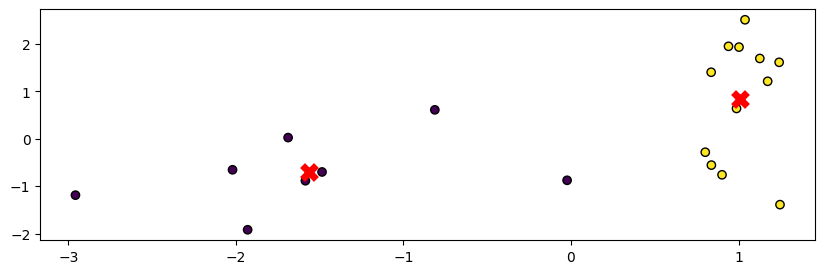

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,3))
plt.scatter(x = X[:, 0], y=X[:,1], c=pred, edgecolors='k')
plt.scatter(x = centers[:, 0], y=centers[:, 1], c='r', marker='x', s=100, lw=5)
plt.show()

## cf Normalizer(스케일러) 적용

In [7]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
Xnor = scaler.fit_transform(X)
np.c_[X, Xnor][:3]

array([[ 1.03859554,  2.51175389,  0.3821159 ,  0.92411441],
       [ 1.00271366,  1.93521549,  0.46005267,  0.88789162],
       [-1.6881048 ,  0.02599427, -0.99988146,  0.01539667]])

In [8]:
model = KMeans(n_clusters=2,
              init='random',
              n_init='auto', #init가 k-means++이면 1, init가 random이면 10
              max_iter=300)
model.fit(Xnor)

KMeans(init='random', n_clusters=2, n_init='auto')

In [9]:
# 0그룹으로 분류된 Xnor
Xnor[model.labels_==0, 0] # x축
Xnor[model.labels_==0, 1] # y축

array([ 0.92411441,  0.88789162, -0.64410538,  0.85921456, -0.55183889,
        0.83284742, -0.33227958,  0.90097328,  0.79255068, -0.74396888,
        0.54408875,  0.7188508 ])

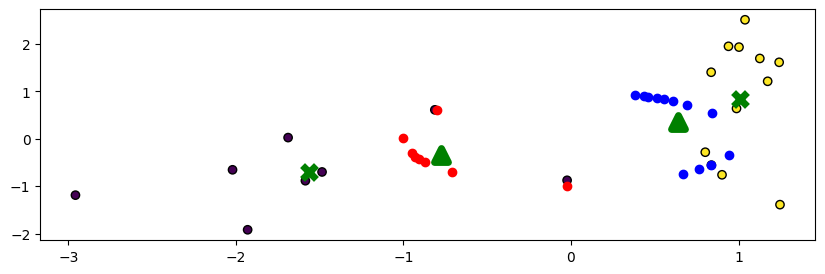

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,3))
plt.scatter(x = X[:, 0], y=X[:,1], c=pred, edgecolors='k')
plt.scatter(x = centers[:, 0], y=centers[:, 1], c='g', marker='x', s=100, lw=5)
plt.scatter(x = Xnor[model.labels_==0, 0],
            y = Xnor[model.labels_==0, 1], c='b')
plt.scatter(x = Xnor[model.labels_==1, 0],
            y = Xnor[model.labels_==1, 1], c='r')
plt.scatter(x = model.cluster_centers_[:, 0],
            y = model.cluster_centers_[:, 1], c='g', marker='^', s=100, lw=5)
plt.show()

In [11]:
model.cluster_centers_

array([[ 0.64128684,  0.34902823],
       [-0.77398837, -0.33522479]])

## K-Means 클러스터링의 한계점(13p)
- 군의 특성이 다를 경우
    * 군의 크기가 다른 경우
    * 군의 밀도가 다른 경우
    * 군이 비구형
- 이상치를 포함할 경우 : 이상치를 조정하거나 삭제한 후 클러스터링
### - 군의 크기가 다른 경우

In [12]:
# group0 : 평균-10, 표준편차2인 10행2열 배열
group0 = np.random.normal(loc=-10, scale=2, size=(10,2))
y = np.full(len(group0), 0)
group0 = np.c_[group0, y]
group0[:3]

array([[-11.64735349,  -7.85658538,   0.        ],
       [ -6.41928061, -10.86508759,   0.        ],
       [ -8.45178172,  -9.17760203,   0.        ]])

In [13]:
# group1 : 평균10, 표준편차2인 10행2열 배열
group1 = np.random.normal(loc=10, scale=2, size=(10,2))
y = np.full(len(group1), 1)
group1 = np.c_[group1, y]
group1[:3]

array([[ 9.91398898,  9.16862202,  1.        ],
       [ 6.6986032 , 10.35767153,  1.        ],
       [13.1665322 , 11.09653614,  1.        ]])

In [14]:
# group2 : 평균0, 표준편차5인 100행2열 배열
group2 = np.random.normal(loc=0, scale=5, size=(100,2))
y = np.full(len(group2), 2)
group2 = np.c_[group2, y]
group2[:2]

array([[ 1.20804053, -1.67538803,  2.        ],
       [-0.92213261, -6.25387235,  2.        ]])

In [15]:
data = np.r_[group0, group1, group2]
data[::10], data.shape

(array([[-11.64735349,  -7.85658538,   0.        ],
        [  9.91398898,   9.16862202,   1.        ],
        [  1.20804053,  -1.67538803,   2.        ],
        [  0.93634855,   0.74012515,   2.        ],
        [ -0.8588299 ,   7.2262921 ,   2.        ],
        [  1.53722215,  -3.59215677,   2.        ],
        [ -8.28981532,  -4.31474831,   2.        ],
        [  1.4274489 ,   2.28922819,   2.        ],
        [ -5.58995184,   3.66909655,   2.        ],
        [ -3.56516378,   2.70421546,   2.        ],
        [  4.13262918,  -3.24389044,   2.        ],
        [ -4.50797709,   1.56404112,   2.        ]]),
 (120, 3))

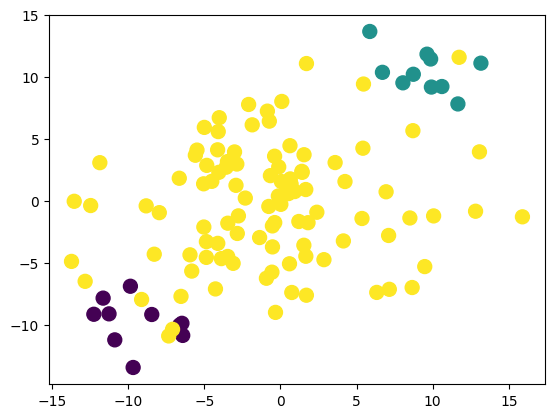

In [16]:
plt.scatter(x=data[:,0], y=data[:,1], c=data[:,2], s=100)

In [17]:
model = KMeans(n_clusters=3, init='k-means++', n_init='auto')
model.fit(data[:, :2])

KMeans(n_clusters=3, n_init='auto')

In [18]:
centers = model.cluster_centers_ # 중심점
centers

array([[ 9.2594871 ,  6.95682555],
       [-7.63920361, -6.15187029],
       [-0.16807335,  0.44559733]])

In [19]:
pred = model.predict(data[:, :2]) # 예측값
pred = model.labels_ # 모델이 클러스터링한 결과

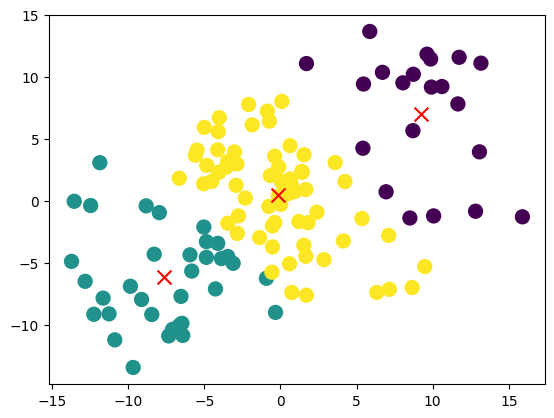

In [20]:
plt.scatter(x=data[:, 0], y=data[:, 1], c=pred, s=100)
plt.scatter(x=centers[:,0], y=centers[:,1], c='r', s=100, marker='x')

In [21]:
# 위의 단점을 보완하고자 6개 그룹으로 clustering
model = KMeans(n_clusters=6, n_init=10)
model.fit(data[:, :2])

KMeans(n_clusters=6, n_init=10)

In [22]:
centers = model.cluster_centers_
pred = model.labels_
pred

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2,
       3, 1, 2, 4, 0, 1, 1, 3, 1, 2, 1, 1, 2, 1, 1, 1, 1, 3, 1, 0, 5, 2,
       5, 1, 4, 5, 1, 5, 2, 1, 4, 2, 5, 4, 2, 5, 1, 1, 3, 1, 2, 0, 5, 1,
       4, 3, 2, 4, 1, 1, 3, 3, 4, 4, 2, 2, 0, 5, 4, 4, 4, 1, 1, 4, 2, 4,
       4, 2, 4, 2, 4, 2, 2, 5, 2, 4, 5, 4, 5, 4, 2, 1, 5, 4, 1, 2, 2, 2,
       4, 1, 1, 1, 2, 2, 2, 1, 2, 0])

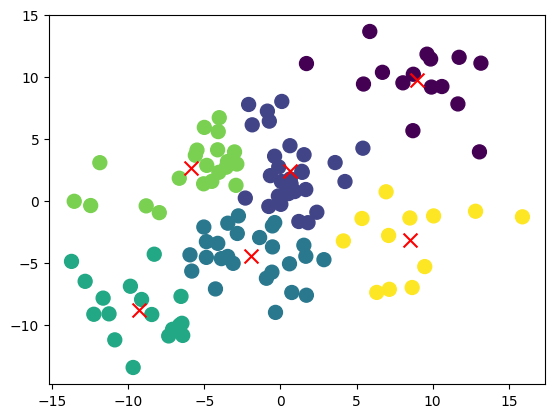

In [23]:
plt.scatter(x=data[:, 0], y=data[:, 1], c=pred, s=100)
plt.scatter(x=centers[:,0], y=centers[:,1], c='r', s=100, marker='x')

In [24]:
data[pred==0, 0] # 0번 그룹의 x축 데이터

array([ 9.91398898,  6.6986032 , 13.1665322 , 10.60357402,  5.8675998 ,
        8.04216948, 11.65472871,  9.62614465,  8.7255019 ,  9.86431761,
        1.70770146,  5.45303497, 13.07020959,  8.69905191, 11.73449298])

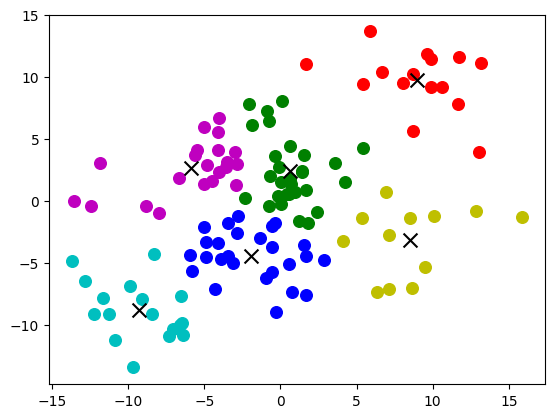

In [25]:
colors = ['r', 'g', 'b', 'c', 'm', 'y'] # 0,1,2,5 / 3 / 4

for i in range(len(colors)):
    plt.scatter(x = data[pred==i, 0],
                y = data[pred==i, 1], c=colors[i], s=70)
plt.scatter(x=centers[:,0], y=centers[:,1], c='k', s=100, marker='x')

# 3절 Hierarchical 클러스터링(계층적 군집분석)
- 계층적 분석(linkage) -> dendrogram -> fcluster를 이용해서 클러스터를 생성
    
    * 군끼리 묶으면서 최종적으로는 하나의 군집이 될 때까지 군을 묶는 클러스터링 알고리즘
    * 군집의 수를 미리 정해주지 않아도 됨
    * Dendrogram을 이용하여 다양한 군집 수 시각화

In [30]:
from seaborn import load_dataset
iris = load_dataset('iris')
iris.sample(1)

,sepal_length,sepal_width,petal_length,petal_width,species
107,7.3,2.9,6.3,1.8,virginica


In [31]:
# 계층적 군집결과와 맞추기 위한 라벨 인코딩
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris['species'] = le.fit_transform(iris.species)
iris.loc[::50]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
50,7.0,3.2,4.7,1.4,1
100,6.3,3.3,6.0,2.5,2


In [ ]:
iris[['sepal_length', 'sepal_width']]

In [34]:
from scipy.cluster.hierarchy import linkage
# method='single' : 가장 가까운 거리를 이용
# mothod='complete' : 가장 먼 거리를 이용
cluster_model = linkage(iris, method='complete') #linkage 안에 문자 데이터 못 넣어
cluster_model.shape

(149, 4)

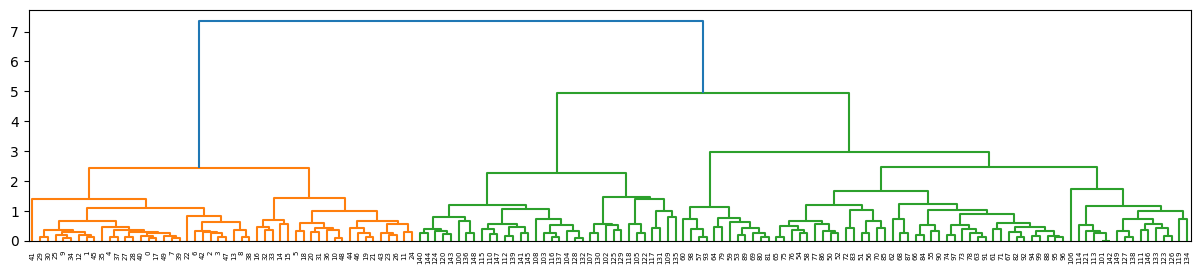

In [38]:
# dendrogram
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
plt.figure(figsize=(15,3))
dendrogram(cluster_model, labels=iris.index)
# 파일로 저장
plt.savefig('data/ch02_dendrogram.png', dpi=300)
plt.show()

In [40]:
# 클러스터링
from scipy.cluster.hierarchy import fcluster
fcluster(
    cluster_model, # linkage()로 만든 클러스터링 결과
    t=6, #클러스트를 나누는 임계값(threshold)
    criterion='distance'
)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [41]:
pred = fcluster(cluster_model, 4, 'distance')
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3], dtype=int32)

In [42]:
# pred에서 1은 0, 3은 1, 2는 2로 변경
import numpy as np
np.choose([3,3,2,1,2], [0,10,20,30]) # np.choose(인덱스, 값)

array([30, 30, 20, 10, 20])

In [44]:
adjusted_pred =np.choose(pred, [999, 0, 2, 1])
adjusted_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [46]:
import pandas as pd
pd.crosstab(iris.species, adjusted_pred, rownames=['실제'], colnames=['예측'], margins=True)

예측,0,1,2,All
실제,,,,
0,50,0,0,50
1,0,50,0,50
2,0,16,34,50
All,50,66,34,150


In [52]:
original_name = le.inverse_transform(iris.species)
pred_name = le.inverse_transform(adjusted_pred)
pd.crosstab(original_name, pred_name, rownames=['실제'], colnames=['예측'], margins=True)

예측,setosa,versicolor,virginica,All
실제,,,,
setosa,50,0,0,50
versicolor,0,50,0,50
virginica,0,16,34,50
All,50,66,34,150


<Axes: xlabel='petal_length', ylabel='petal_width'>

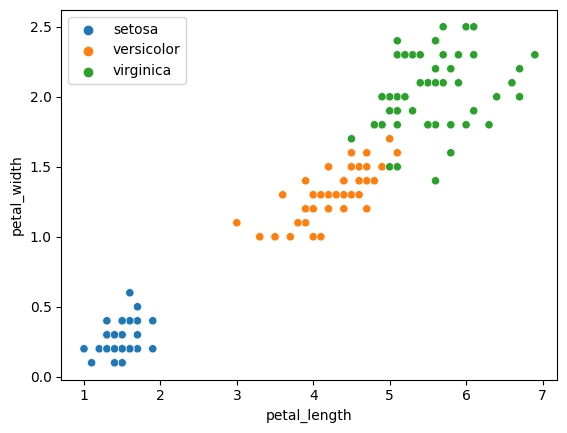

In [54]:
import seaborn as sns
sns.scatterplot(
    data=iris,
    x='petal_length', y='petal_width',
    hue=original_name
)

# 4절 DBSCAN 클러스터링
- 연결 기반(밀도 기반) 군집화 알고리즘. 이상치를 자동 감지
- 단점: 클러스터의 밀도가 일정하지 안흥면 성능이 낮아짐

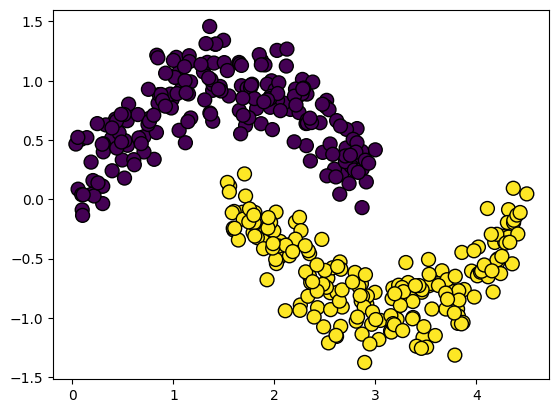

In [66]:
X1 = np.random.rand(200)*3 # 0~3 사이의 수 200개 # 0 : rand(데이터 개수)*3 < 3. 균등분포
noise = np.random.normal(0, 0.2, X1.shape) # 평균 0 , 표준편차 0.2, 200개 정규분포
Y1 = np.sin(X1) + noise
#plt.scatter(x=X1, y=Y1)
group1 = np.c_[X1, Y1, np.full(len(X1), 0)]

X2 = X1 + 1.5
noise = np.random.normal(0, 0.2, X1.shape)
Y2 = np.cos(X2) + noise
#plt.scatter(x=X2, y=Y2)
group2 = np.c_[X2, Y2, np.full(len(X2), 1)]

data = np.r_[group1, group2]
plt.scatter(x=data[:, 0], y=data[:, 1], c=data[:, 2], s=100, edgecolors='k')
plt.show()

In [69]:
# KMeans : 거리 기반 클러스터링
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2, init='random', n_init=10)
model.fit(data[:, :2])
pred = model.predict(data[:,:2])

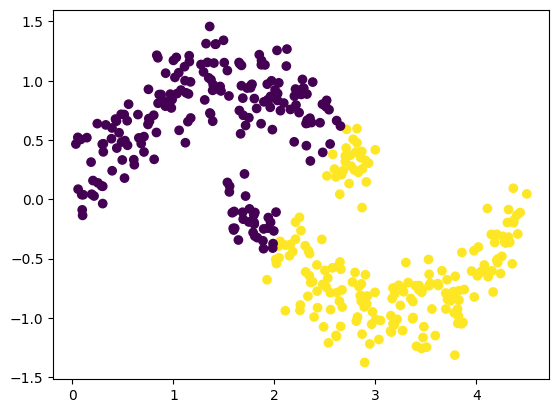

In [70]:
plt.scatter(x=data[:,0], y=data[:, 1], c=pred)
plt.show()

In [71]:
# DBSCAN : 밀도 기반 클러스터링
from sklearn.cluster import DBSCAN
# 반경(epsilon)이 0.3 이내의 최소 10개 데이터씩 군집화
db_model = DBSCAN(eps=0.3, min_samples=10)
db_model.fit(data[:, :2])

DBSCAN(eps=0.3, min_samples=10)

In [81]:
label = db_model.labels_ # -1: 자동 감지된 이상치
n_noise = list(label).count(-1)
n_cluster = len(set(label)) - (1 if -1 in label else 0) # 이상치가 있으면 1을 빼라
print('이상치 개수:', n_noise, '/ 예측된 클러스터 개수:', n_cluster)

이상치 개수: 0 / 예측된 클러스터 개수: 2


In [82]:
# 0그룹으로 분류된 data
data[label==0][:3]

array([[1.87224679, 1.17017722, 0.        ],
       [2.26460929, 0.88412881, 0.        ],
       [2.70963008, 0.43221302, 0.        ]])

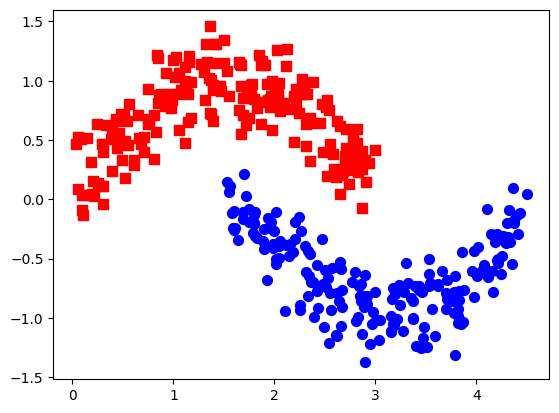

In [85]:
colors = ['r', 'b']
markers = ['s', 'o']
for i in range(n_cluster):
    plt.scatter(
        x = data[label==i, 0], 
        y = data[label==i, 1],
        s = 50, c = colors[i], marker = markers[i]
    )
plt.scatter(x=data[label==-1, 0], y=data[label==-1, 1],
           s=50, c='k', marker='x', lw=5)

# 5절 군집 모형의 성능 평가
- score 함수를 통해 예측 모형 평가(분류, 회귀, 군집에서는 안 씀)
- metrics 모듈의 함수를 통해 군집 모형 평가
- 실루엣 계수(클러스터 소속과 개수를 모를 때)
## 5.1. metrics 함수 이용

In [86]:
iris.sample()

,sepal_length,sepal_width,petal_length,petal_width,species
9,4.9,3.1,1.5,0.1,0


In [98]:
iris_X = iris.iloc[:, :-1]
iris_y = iris.iloc[:, -1]
iris_X.shape, iris_Y.shape

((150, 4), (150,))

In [99]:
# 3개 그룹으로 군집화
iris_model3 = KMeans(n_clusters=3, random_state=1, n_init=10)
iris_model3.fit(iris_X)
pred = iris_model3.labels_
pred = iris_model3.predict(iris_X)
print(pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [100]:
# pred 조정 (1>0, 0>1, 2>2)
pred3 = np.choose(pred, [1,0,2]) # 3개 그룹으로 군집화한 결과(예측값)

In [101]:
# 3개 그룹으로 군집화한 자료
print('실제값:', iris_y[::50])
print('예측값:', pred3[::50])

실제값: 0      0
50     1
100    2
Name: species, dtype: int32
예측값: [0 1 2]


In [102]:
# 2개 그룹으로 군집화
iris_model2 = KMeans(n_clusters=2, n_init=10, random_state=1)
iris_model2.fit(iris_X)
pred2 = iris_model2.labels_

In [103]:
# 2개 그룹으로 군집화한 자료
iris_y2 = np.array([0]*50 + [1]*100)
print('실제값 :', iris_y2)
print('예측값 :', pred2)

실제값 : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
예측값 : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


### 조정된 rand 지수

In [97]:
# 3개 그룹
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(labels_true=iris_y, #실제값
                   labels_pred=pred3) #예측값

0.7302382722834697

In [104]:
# 2개 그룹 평가
adjusted_rand_score(labels_true=iris_y2,
                   labels_pred=pred2)

0.920405050901892

### 상호의존도를 나타내는 지표
- 두 군집간 정보 공유 정도

In [105]:
species_name = le.inverse_transform(iris_y) # 실제값 원형
pred_name = le.inverse_transform(pred3) # 예측값(이름)

In [106]:
# 3그룹 평가
from sklearn.metrics import mutual_info_score
print(mutual_info_score(iris.species, pred3))
print(mutual_info_score(species_name, pred3))

0.8255910976103356
0.8255910976103356


In [107]:
# 2그룹 평가
mutual_info_score(iris_y2, pred2)

0.5596576064224734

### 그 외 클러스터링 성능평가 기준들

In [109]:
from sklearn.metrics import homogeneity_score
# 동질성
print('3그룹:', homogeneity_score(iris.species, pred3))
print('3그룹:', homogeneity_score(species_name, pred_name))
print('2그룹:', homogeneity_score(iris_y2, pred2))

3그룹: 0.7514854021988338
3그룹: 0.7514854021988338
2그룹: 0.8792539652679946


In [110]:
from sklearn.metrics import completeness_score
# 정답과의 유사성
print('3그룹:', completeness_score(iris.species, pred3))
print('3그룹:', completeness_score(species_name, pred_name))
print('2그룹:', completeness_score(iris_y2, pred2))

3그룹: 0.7649861514489815
3그룹: 0.7649861514489815
2그룹: 0.861693475999054


In [111]:
# homogeneity_score와 completeness_score의 조화평균
from sklearn.metrics import v_measure_score
print('3그룹:', v_measure_score(iris.species, pred3))
print('3그룹:', v_measure_score(species_name, pred_name))
print('2그룹:', v_measure_score(iris_y2, pred2))

3그룹: 0.7581756800057784
3그룹: 0.7581756800057784
2그룹: 0.870385156563164


## 5.2. 실루엣 계수

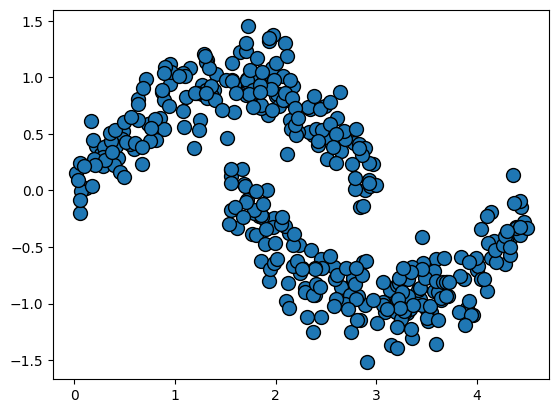

In [117]:
np.random.seed(0)
X1 = np.random.rand(200)*3 # 0~3 사이의 수 200개 # 0 : rand(데이터 개수)*3 < 3. 균등분포
noise = np.random.normal(0, 0.2, X1.shape) # 평균 0 , 표준편차 0.2, 200개 정규분포
Y1 = np.sin(X1) + noise
#plt.scatter(x=X1, y=Y1)
group1 = np.c_[X1, Y1, np.full(len(X1), 0)]

X2 = X1 + 1.5
noise = np.random.normal(0, 0.2, X1.shape)
Y2 = np.cos(X2) + noise
#plt.scatter(x=X2, y=Y2)
group2 = np.c_[X2, Y2, np.full(len(X2), 1)]

data = np.r_[group1, group2]
plt.scatter(x=data[:, 0], y=data[:, 1], s=100, edgecolors='k')
plt.show()

In [119]:
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for n_cluster in range_n_clusters:
    model = KMeans(
        n_clusters=n_cluster,
        # init='k-means++' # def
        n_init=10,
        random_state=0
    )
    model.fit(data[:, :-1])
    score = silhouette_score(X=data[:, :-1], labels=model.labels_)
    print('클러스터 수: {}, 실루엣 계수: {}'.format(n_cluster, score))
# 실루엣 계수가 가장 높은 7개로 클러스터링 

클러스터 수: 2, 실루엣 계수: 0.5319154905481303
클러스터 수: 3, 실루엣 계수: 0.4675310928682518
클러스터 수: 4, 실루엣 계수: 0.47531670307119467
클러스터 수: 5, 실루엣 계수: 0.49065908101876077
클러스터 수: 6, 실루엣 계수: 0.4846410902943432
클러스터 수: 7, 실루엣 계수: 0.5079889111161713
클러스터 수: 8, 실루엣 계수: 0.4959234083493174
클러스터 수: 9, 실루엣 계수: 0.4720840530079055
클러스터 수: 10, 실루엣 계수: 0.4460355216087853


In [121]:
model = KMeans(n_clusters=7, init='random', n_init=10)
model.fit(data[:, :-1])
pred = model.labels_
pred = model.predict(data[:,:-1])

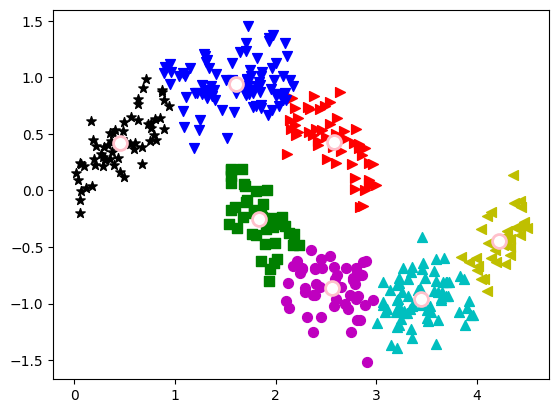

In [125]:
centers = model.cluster_centers_
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k'] # 7, 1, 3 : 0 / 2, 4, 5, 6 : 1
markers = ['>', 's', 'v', '^', 'o', '<', '*']
# 각 클러스터로 분류된 데이터
for i, c in enumerate(centers):
    plt.scatter(x = data[pred==i, 0], y = data[pred==i, 1], s=50, c=colors[i], marker=markers[i])
    plt.scatter(x = c[0], y = c[1], s=100, c='w', edgecolors='pink', lw=2)
#    data[pred==i]

# 6절 연습문제
iris 데이터의 petal_length열과
petal_width열을 이용해서 K-Means
알고리즘으로 군집분석하고 그래프로
시각화하세요(단, 각 클러스터의 중심점이 함께
표시되고 군의 수는 2로 설정)